In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [48]:
df = pd.read_csv("data.csv")

In [49]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [50]:
# The dataframe with our features only (picked 13 columns out of 15) to draw the heatmap
features_df = df.drop('Unnamed: 0', axis=1)
features_df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Data Visualization and Heatmap

<Axes: >

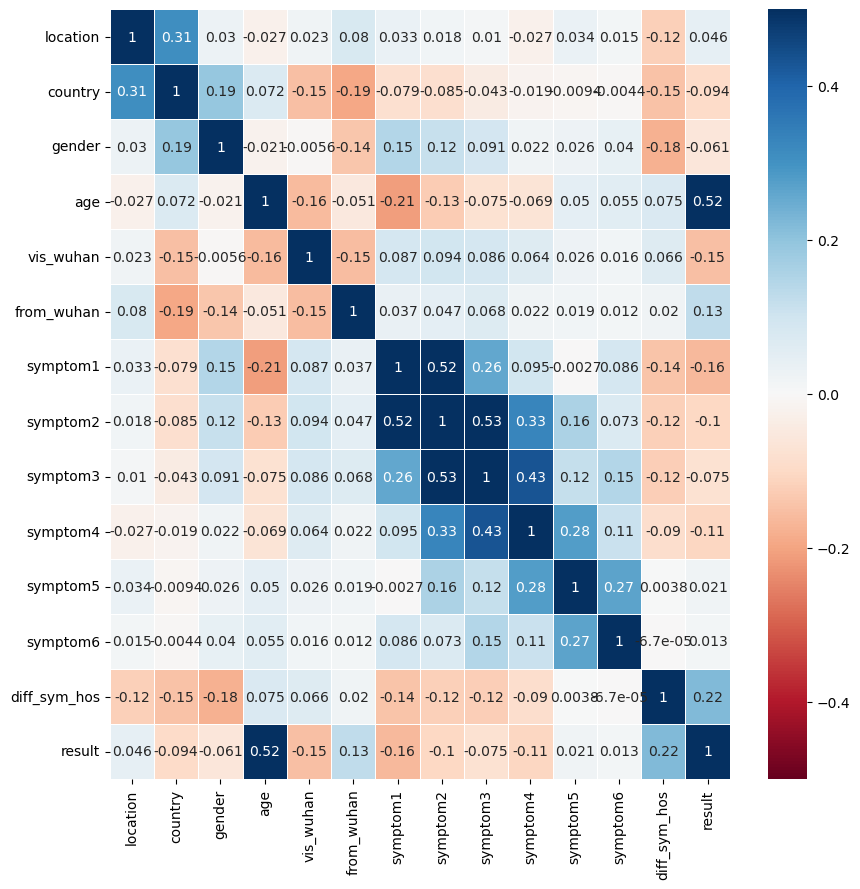

In [51]:
corrmatrix = features_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrmatrix, cmap='RdBu', vmin=-0.5, vmax=0.5, linewidths=0.5, annot=True, ax= ax)

<function matplotlib.pyplot.show(close=None, block=None)>

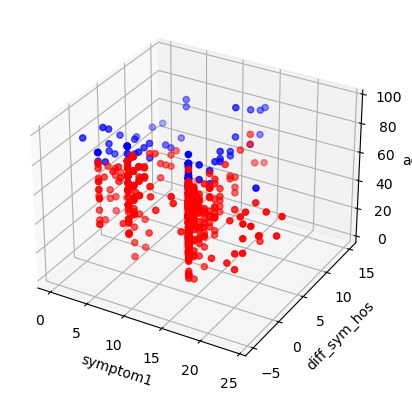

In [52]:
df.head()
real_df= df.drop('Unnamed: 0', axis=1)

class1_df = real_df[real_df["result"] == 0]
class2_df = real_df[real_df["result"] == 1]

# plotting a 4d scatter plot where the 4th dimension is represented with a different color, red = death
# blue = no death, 3d are: symptom3, country, age because of their strong correlation (check the heatmap)
fig1 = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig1.add_subplot(projection='3d') 
ax1.set_xlabel("symptom1")
ax1.set_ylabel("diff_sym_hos")
ax1.set_zlabel("age")
ax1.scatter3D(class1_df["symptom1"], class1_df["diff_sym_hos"], class1_df["age"], color="red")
ax1.scatter3D(class2_df["symptom1"], class2_df["diff_sym_hos"], class2_df["age"], color="blue")
plt.show

In [53]:
x = df.iloc[:,1:14].values
y = df.iloc[:,-1].values

In [54]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
    test_size=0.25, random_state= 20)


# SVM Model

In [104]:
svm_classifier = svm.SVC(kernel='rbf', gamma=0.0001, C=1, probability=True)

# fitting the model with our train data
svm_classifier.fit(x_train, y_train)


SVC(C=1, gamma=0.0001, probability=True)

# Validation and Testing before hyperparameters Tuning

In [105]:
y_pred = svm_classifier.predict(x_val)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred))
print("Precision:", metrics.precision_score(y_val , y_pred))
print("F1 score:",metrics.f1_score(y_val , y_pred))
print("Recall:", metrics.recall_score(y_val , y_pred))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred))

SVM Validation classifier results:
Accuracy: 0.9132947976878613
Precision: 0.7777777777777778
F1 score: 0.48275862068965514
Recall: 0.35
ROC score: 0.6684640522875818


In [106]:
y_pred2 = svm_classifier.predict(x_test)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred2))
print("Precision:", metrics.precision_score(y_test , y_pred2))
print("F1 score:",metrics.f1_score(y_test , y_pred2))
print("Recall:", metrics.recall_score(y_test , y_pred2))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred2))

SVM Validation classifier results:
Accuracy: 0.8959537572254336
Precision: 0.9
F1 score: 0.5
Recall: 0.34615384615384615
ROC score: 0.6696755625327054


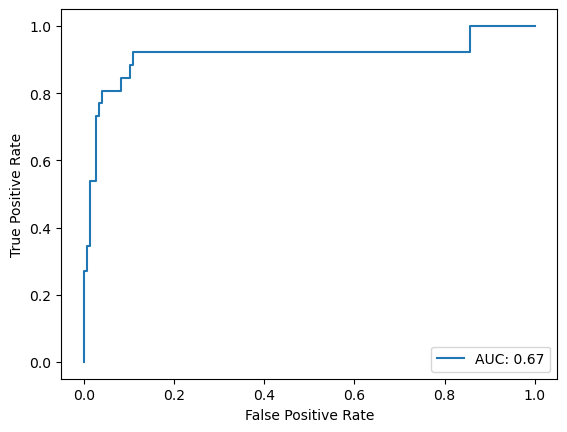

In [111]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba = svm_classifier.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)


plt.plot(fpr, tpr, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# SVM Tuning

In [96]:
# defining parameter range

grid_params_svm = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']} 
  
grid = GridSearchCV(svm.SVC(), grid_params_svm, refit = True, verbose = 3)


In [97]:
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.942 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.951 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.961 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.952 total time=   0.2s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.903 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.961 total time=   0.2s
[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.971 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.962 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.903 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.942 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.962 total time=   0.1s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.952 total time=   0.2s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.903 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [98]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


# Testing and Vlidation after hyperparameters Tuning


In [114]:
svm_classifier_2 = svm.SVC(kernel='linear', gamma=1, C=1, probability=True)

# fitting the model with our train data
svm_classifier_2.fit(x_train, y_train)

SVC(C=1, gamma=1, kernel='linear', probability=True)

In [115]:
y_pred3 = svm_classifier_2.predict(x_val)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred3))
print("Precision:", metrics.precision_score(y_val , y_pred3))
print("F1 score:",metrics.f1_score(y_val , y_pred3))
print("Recall:", metrics.recall_score(y_val , y_pred3))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred3))

SVM Validation classifier results:
Accuracy: 0.930635838150289
Precision: 1.0
F1 score: 0.5714285714285715
Recall: 0.4
ROC score: 0.7


In [118]:
y_pred4 = svm_classifier_2.predict(x_test)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred4))
print("Precision:", metrics.precision_score(y_test , y_pred4))
print("F1 score:",metrics.f1_score(y_test , y_pred4))
print("Recall:", metrics.recall_score(y_test , y_pred4))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred4))

SVM Validation classifier results:
Accuracy: 0.9479768786127167
Precision: 1.0
F1 score: 0.7906976744186047
Recall: 0.6538461538461539
ROC score: 0.8269230769230769


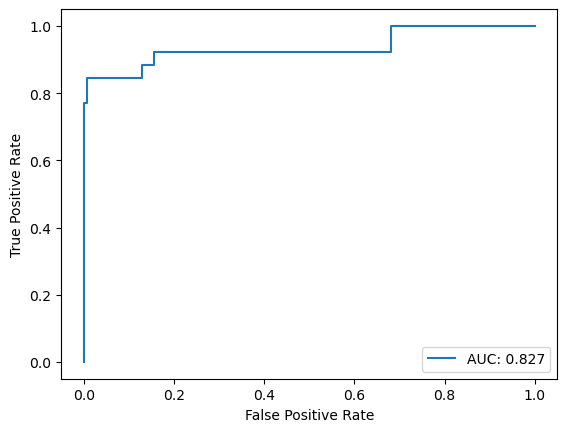

In [117]:
y_pred_proba2 = svm_classifier_2.predict_proba(x_test)[::, 1]
fpr2, tpr2, _2 = metrics.roc_curve(y_test, y_pred_proba2)
plt.plot(fpr2, tpr2, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred4),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Performance Comparison

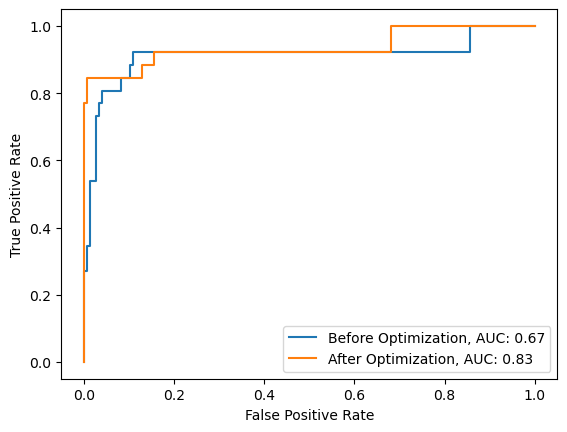

In [119]:
plt.plot(fpr, tpr, label="Before Optimization, AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2),2)))
plt.plot(fpr2, tpr2, label="After Optimization, AUC: " +str(round(metrics.roc_auc_score(y_test, y_pred4),2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Accuracy Change 

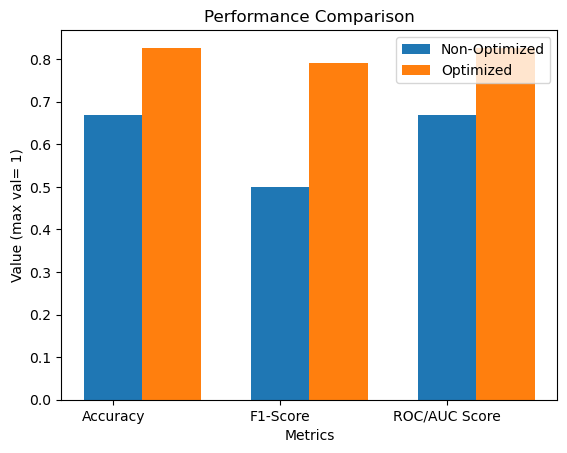

In [120]:
initACC =  metrics.roc_auc_score(y_test, y_pred2)
finalACC = metrics.roc_auc_score(y_test, y_pred4)

initF1 =  metrics.f1_score(y_test, y_pred2)
finalF1 = metrics.f1_score(y_test, y_pred4)

initROC = metrics.roc_auc_score(y_test, y_pred2)
finalROC = metrics.roc_auc_score(y_test, y_pred4)

data1 = np.array([finalACC, finalF1, finalROC])
data2 = np.array([initACC,initF1, initROC])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1)), data2, bar_width, label='Non-Optimized')

# Plot the second set of bars
ax.bar(np.arange(len(data2)) + bar_width, data1, bar_width, label='Optimized')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1)))
ax.set_xticklabels(['Accuracy', 'F1-Score', 'ROC/AUC Score'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()